In [1]:
%matplotlib inline

In [2]:
import sectionate
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

In [3]:
grid = xr.open_dataset('grid_CM2_minimal.nc')

In [4]:
grid

<xarray.Dataset>
Dimensions:   (xt_ocean: 1440, xu_ocean: 1440, yt_ocean: 1070, yu_ocean: 1070)
Coordinates:
    geolat_c  (yu_ocean, xu_ocean) float32 ...
    geolat_t  (yt_ocean, xt_ocean) float32 ...
    geolon_c  (yu_ocean, xu_ocean) float32 ...
    geolon_t  (yt_ocean, xt_ocean) float32 ...
  * xt_ocean  (xt_ocean) float64 -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * xu_ocean  (xu_ocean) float64 -279.8 -279.5 -279.2 -279.0 ... 79.5 79.75 80.0
  * yt_ocean  (yt_ocean) float64 -80.02 -79.92 -79.81 ... 89.74 89.84 89.95
  * yu_ocean  (yu_ocean) float64 -79.97 -79.86 -79.76 ... 89.79 89.89 90.0
Data variables:
    area_t    (yt_ocean, xt_ocean) float32 ...
    area_u    (yu_ocean, xu_ocean) float32 ...
    ht        (yt_ocean, xt_ocean) float32 ...
    hu        (yu_ocean, xu_ocean) float32 ...
    kmt       (yt_ocean, xt_ocean) float32 ...
    kmu       (yu_ocean, xu_ocean) float32 ...

In [5]:
West_section_lats=[52.0166, 52.6648, 53.5577, 58.8944, 60.4000]
West_section_lons=[-56.8775, -52.0956, -49.8604, -47.6107, -44.8000]
East_section_lats=[60.3000, 58.8600, 58.0500, 58.0000, 56.5000]
East_section_lons=[-44.9000, -30.5400, -28.0000, -14.7000, -5.9300]

## Western part

In [6]:
iwest = np.array([])
jwest = np.array([])
xwest = np.array([])
ywest = np.array([])
for k in range(len(West_section_lats)-1):
    isec, jsec, xsec, ysec = sectionate.create_section(grid['geolon_t'], grid['geolat_t'],
                                                       West_section_lons[k], 
                                                       West_section_lats[k], 
                                                       West_section_lons[k+1],
                                                       West_section_lats[k+1], rounding='up', tol=2.)
    iwest = np.concatenate([iwest, isec], axis=0)
    jwest = np.concatenate([jwest, jsec], axis=0)
    xwest = np.concatenate([xwest, xsec], axis=0)
    ywest = np.concatenate([ywest, ysec], axis=0)

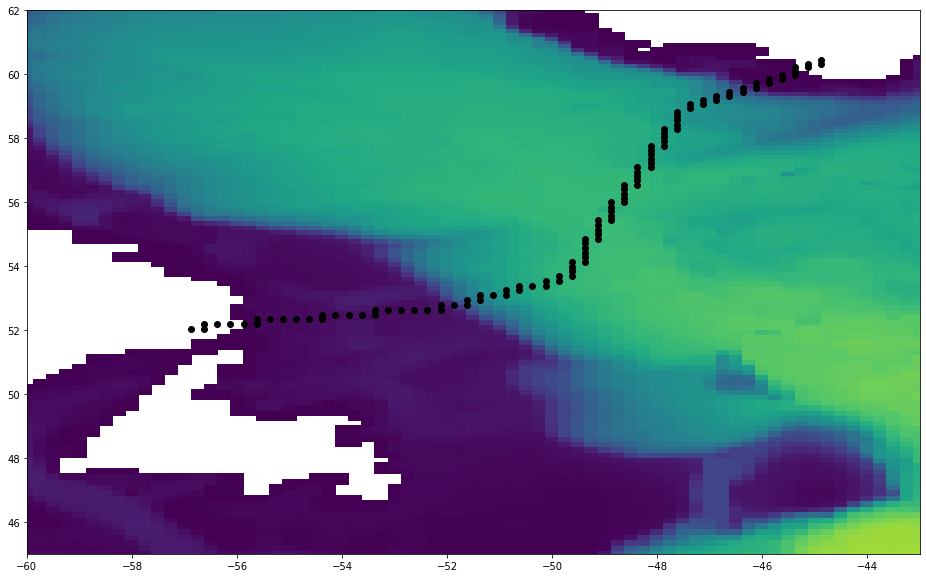

In [7]:
plt.figure(figsize=[16,10])
plt.pcolormesh(grid['geolon_t'], grid['geolat_t'], grid['ht'][1::,1::])
plt.plot(xwest, ywest, 'ko')
plt.axis([-60,-43, 45, 62])
plt.show()

The grid cell indices are then ready to be used to compute the section.

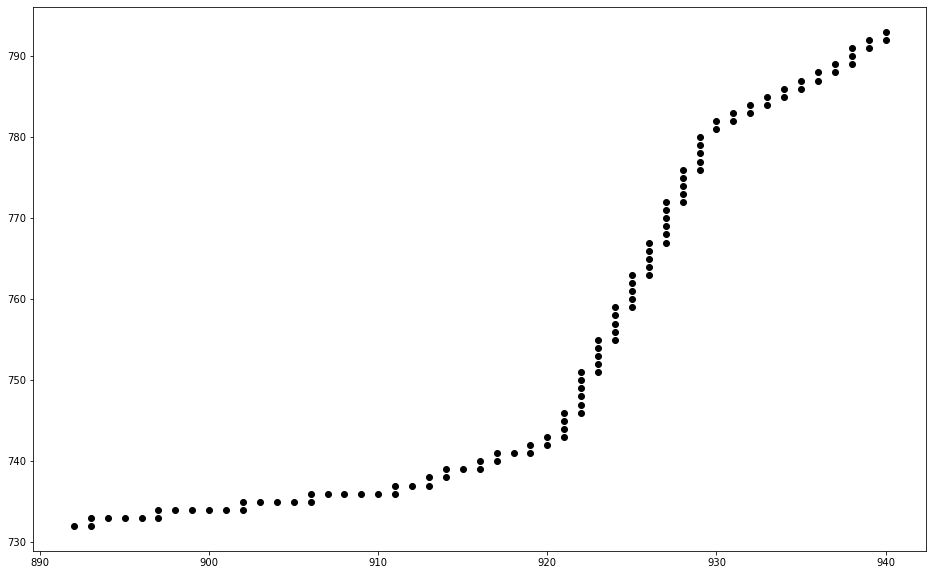

In [8]:
# double check for missing points
plt.figure(figsize=[16,10])
plt.plot(iwest, jwest, 'ko')

Print the i,j and associated lon/lat:

In [9]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(iwest, jwest)

for point in uvpoints:
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = grid['geolon_c'].isel(xu_ocean=i, yu_ocean=j).values
        lat = grid['geolat_t'].isel(xt_ocean=i, yt_ocean=j).values
    elif pttype == 'V':
        lon = grid['geolon_t'].isel(xt_ocean=i, yt_ocean=j).values
        lat = grid['geolat_c'].isel(xu_ocean=i, yu_ocean=j).values
    print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

V, 893.0, 732.0, -56.625, 52.10049819946289
U, 893.0, 733.0, -56.5, 52.177284240722656
V, 894.0, 733.0, -56.375, 52.25380325317383
V, 895.0, 733.0, -56.125, 52.25380325317383
V, 896.0, 733.0, -55.875, 52.25380325317383
V, 897.0, 733.0, -55.625, 52.25380325317383
U, 897.0, 734.0, -55.5, 52.330322265625
V, 898.0, 734.0, -55.375, 52.406578063964844
V, 899.0, 734.0, -55.125, 52.406578063964844
V, 900.0, 734.0, -54.875, 52.406578063964844
V, 901.0, 734.0, -54.625, 52.406578063964844
V, 902.0, 734.0, -54.375, 52.406578063964844
U, 902.0, 735.0, -54.25, 52.48283767700195
V, 903.0, 735.0, -54.125, 52.55883026123047
V, 904.0, 735.0, -53.875, 52.55883026123047
V, 905.0, 735.0, -53.625, 52.55883026123047
V, 906.0, 735.0, -53.375, 52.55883026123047
U, 906.0, 736.0, -53.25, 52.634822845458984
V, 907.0, 736.0, -53.125, 52.71055221557617
V, 908.0, 736.0, -52.875, 52.71055221557617
V, 909.0, 736.0, -52.625, 52.71055221557617
V, 910.0, 736.0, -52.375, 52.71055221557617
V, 911.0, 736.0, -52.125, 52.7105

## Eastern part

In [16]:
ieast = np.array([])
jeast = np.array([])
xeast = np.array([])
yeast = np.array([])
for k in range(len(East_section_lats)-1):
    isec, jsec, xsec, ysec = sectionate.create_section(grid['geolon_t'], grid['geolat_t'],
                                                       East_section_lons[k], 
                                                       East_section_lats[k], 
                                                       East_section_lons[k+1],
                                                       East_section_lats[k+1], rounding='up', tol=1.5)
    ieast = np.concatenate([ieast, isec], axis=0)
    jeast = np.concatenate([jeast, jsec], axis=0)
    xeast = np.concatenate([xeast, xsec], axis=0)
    yeast = np.concatenate([yeast, ysec], axis=0)

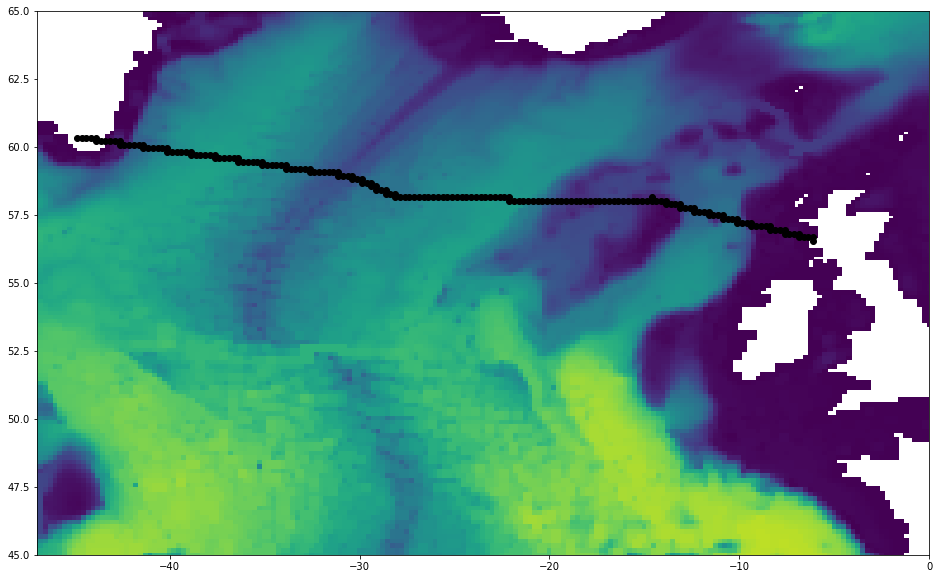

In [17]:
plt.figure(figsize=[16,10])
plt.pcolormesh(grid['geolon_t'], grid['geolat_t'], grid['ht'][1::,1::])
plt.plot(xeast, yeast, 'ko')
plt.axis([-47,-0, 45, 65])
plt.show()

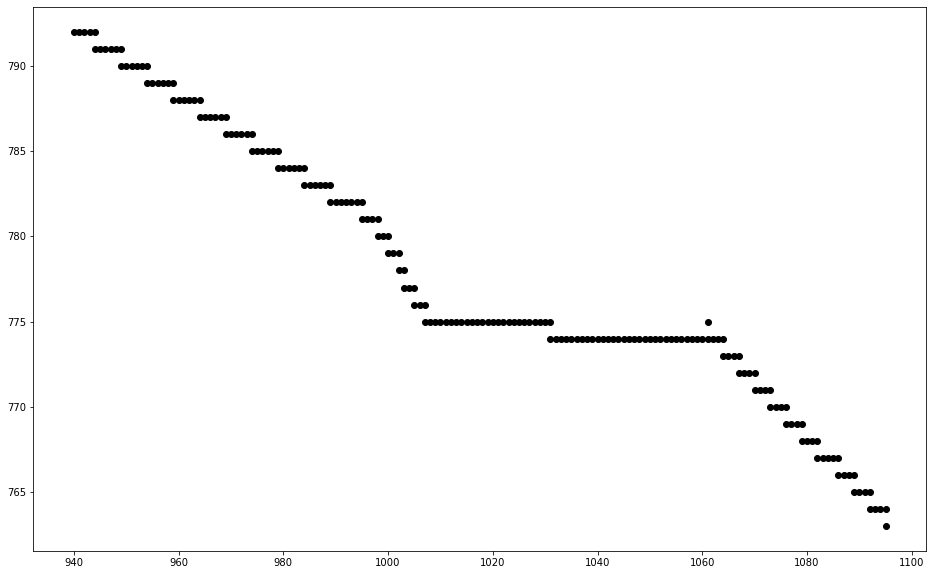

In [18]:
# double check for missing points
plt.figure(figsize=[16,10])
plt.plot(ieast, jeast, 'ko')

In [19]:
uvpoints = sectionate.transports_C.MOM6_UVpoints_from_section(ieast, jeast)

for point in uvpoints:
    pttype, i, j = point
    i = int(i)
    j = int(j)
    if pttype == 'U':
        lon = grid['geolon_c'].isel(xu_ocean=i, yu_ocean=j).values
        lat = grid['geolat_t'].isel(xt_ocean=i, yt_ocean=j).values
    elif pttype == 'V':
        lon = grid['geolon_t'].isel(xt_ocean=i, yt_ocean=j).values
        lat = grid['geolat_c'].isel(xu_ocean=i, yu_ocean=j).values
    print(f'{point[0]}, {point[1]}, {point[2]}, {lon}, {lat}')

V, 941.0, 792.0, -44.625, 60.39453887939453
V, 942.0, 792.0, -44.375, 60.39453887939453
V, 943.0, 792.0, -44.125, 60.39453887939453
V, 944.0, 792.0, -43.875, 60.39453887939453
U, 944.0, 792.0, -43.75, 60.332786560058594
V, 945.0, 791.0, -43.625, 60.27079772949219
V, 946.0, 791.0, -43.375, 60.27079772949219
V, 947.0, 791.0, -43.125, 60.27079772949219
V, 948.0, 791.0, -42.875, 60.27079772949219
V, 949.0, 791.0, -42.625, 60.27079772949219
U, 949.0, 791.0, -42.5, 60.20881271362305
V, 950.0, 790.0, -42.375, 60.14658737182617
V, 951.0, 790.0, -42.125, 60.14658737182617
V, 952.0, 790.0, -41.875, 60.14658737182617
V, 953.0, 790.0, -41.625, 60.14658737182617
V, 954.0, 790.0, -41.375, 60.14658737182617
U, 954.0, 790.0, -41.25, 60.08436584472656
V, 955.0, 789.0, -41.125, 60.021907806396484
V, 956.0, 789.0, -40.875, 60.021907806396484
V, 957.0, 789.0, -40.625, 60.021907806396484
V, 958.0, 789.0, -40.375, 60.021907806396484
V, 959.0, 789.0, -40.125, 60.021907806396484
U, 959.0, 789.0, -40.0, 59.959